In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
from io import StringIO
sample_data = StringIO('#! FIELDS time c1 c2 c3 c4 c5 c6 c7 c8 c9 c10 c11 c12 c13 c14 c15 c16 c17 c18 c19 c20 c21 c22 c23 c24 c25 c26 c27 t1 uwall.bias uwall.force2 metad.bias\n0.000000 2.204118 2.600306 2.298739 2.209628 2.288292 2.095820 2.166161 2.010087 2.273630 2.375872 2.512402 2.127742 2.495236 2.271812 2.484290 2.284208 2.369886 2.296492 2.334408 2.159467 2.372461 2.078497 2.555285 2.182926 2.730650 2.147061 2.538120 6.735057 0.000000 0.000000 0.000000\n0.200000 2.031062 2.540085 2.053563 2.133507 2.306181 2.143282 2.089283 1.974287 2.290906 2.328429 2.566414 2.150073 2.534669 2.296893 2.484577 2.306482 2.349592 2.308390 2.342906 2.156314 2.349252 2.031288 2.525631 2.215484 2.662029 2.129013 2.571015 6.642894 0.000000 0.000000 0.000000')
colnames=sample_data.readline().strip('#! FIELDS ').split()
pd.read_table(sample_data,skiprows=0,header=None,sep=' ',names=colnames)

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c22,c23,c24,c25,c26,c27,t1,uwall.bias,uwall.force2,metad.bias
time,,,,,,,,,,,,,,,,,,,,,
0.0,2.204118,2.600306,2.298739,2.209628,2.288292,2.095820,2.166161,2.010087,2.273630,2.375872,...,2.078497,2.555285,2.182926,2.730650,2.147061,2.538120,6.735057,0.0,0.0,0.0
0.2,2.031062,2.540085,2.053563,2.133507,2.306181,2.143282,2.089283,1.974287,2.290906,2.328429,...,2.031288,2.525631,2.215484,2.662029,2.129013,2.571015,6.642894,0.0,0.0,0.0


In [2]:
def colvar_to_df(f):
    colnames=f.readline().strip('#! FIELDS ').split()
    return pd.read_table(f,skiprows=0,header=None,sep=' ',names=colnames).set_index(colnames[0])
 

In [3]:
with open('C:\\Users\\arthu\\Desktop\\simlab\\rmsdcv\\2dtarget\\COLVAR_2d','r') as colvar_file:
    df = colvar_to_df(colvar_file)
    colvar_file.close()

<AxesSubplot:xlabel='time'>

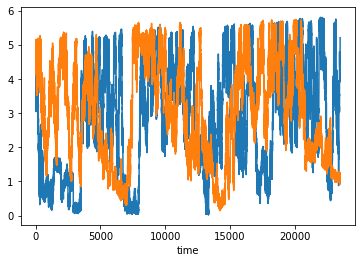

In [4]:
df['t1'].plot()
df['t2'].plot()

# Analysis of 5 runs
I decided to re-run the target_meta simulation 5 times at 100 nanoseconds, to better understand what is going on.

In [3]:
runs = ['run'+str(i) for i in range(2,5)]
colvars = []
for run in runs:
    with open(run + '\\COLVAR_' + run, 'r') as f:
        colvars.append(colvar_to_df(f))

In [4]:
df = colvars[1]
print((df[df['t1'] < 1.0].shape[0] / df.shape[0]) * 100)
df[df['t1'] < 1.0].std()

14.642800000000001


c1                 0.063368
c2                 0.084370
c3                 0.065751
c4                 0.078799
c5                 0.058262
c6                 0.084375
c7                 0.059267
c8                 0.117951
c9                 0.073191
c10                0.083188
c11                0.079699
c12                0.113300
c13                0.080761
c14                0.065144
c15                0.072468
c16                0.068756
c17                0.064181
c18                0.092027
c19                0.074838
c20                0.103369
c21                0.070634
c22                0.099391
c23                0.090416
c24                0.072745
c25                0.087443
c26                0.085204
c27                0.065625
t1                 0.334243
uwall.bias         0.000000
uwall.force2       0.000000
metad.bias      1610.276592
dtype: float64

<AxesSubplot:xlabel='time'>

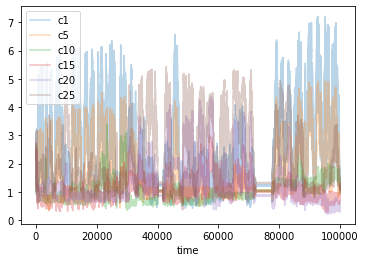

In [5]:
df[['c1','c5','c10','c15','c20','c25']].plot(alpha=0.3)

In [47]:
c4 = df['c4'].values 
c27 = df['c27'].values
df['f'] = (c4-0.8)**2/10 + (c27-1.09)**2/10

(500000, 32)


<AxesSubplot:xlabel='time'>

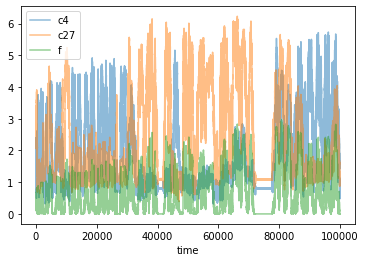

In [48]:
df[['c4','c27','f']].plot(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

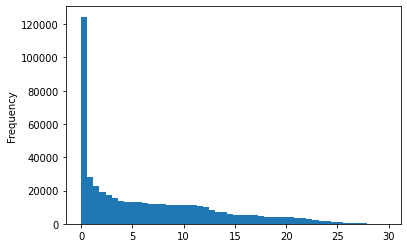

In [38]:
df['f'].plot.hist(bins=50)

<AxesSubplot:xlabel='time'>

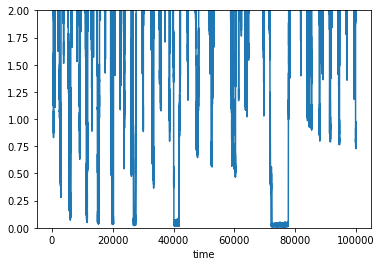

In [58]:
df['t1'].plot(ylim=[0,2])

In [7]:
ts = pd.DataFrame({'run1':colvars[0]['t1'],'run2':colvars[1]['t1'],'run3':colvars[2]['t1']})

<AxesSubplot:ylabel='Frequency'>

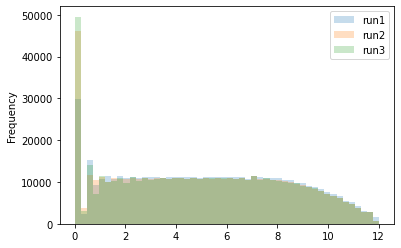

In [14]:
ts.plot.hist(alpha=0.25,bins=50)

In [23]:
ts[ts<1].median()

run1    0.146292
run2    0.045954
run3    0.039600
dtype: float64

In [49]:
with open('interval\\COLVAR_interval', 'r') as f:
    interval = colvar_to_df(f)

<AxesSubplot:xlabel='time'>

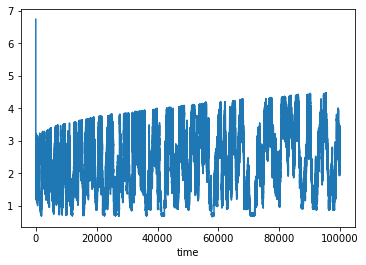

In [52]:
interval['t1'].plot()